In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 확인

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [4]:
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


In [5]:
test.shape

(50, 10)

**train데이터**
- 2016-02-01\~2021-01-26의 데이터(평일만)
- shape: 1205 rows × 12 columns
- 12 columns: 일자/요일/본사정원수/본사휴가자수/본사출장자수/시간외근무명령서승인건수/현본사소속재택근무자수/조식메뉴/중식메뉴/석식메뉴/중식계/석식계


<br>

**test데이터**
- 2021-01-27\~2021-04-09의 데이터(평일만)
- shape: 50 rows × 10 columns
- 10 columns: 일자/요일/본사정원수/본사휴가자수/본사출장자수/시간외근무명령서승인건수/현본사소속재택근무자수/조식메뉴/중식메뉴/석식메뉴

sub 데이터는 test 데이터에 해당하는 기간의 구내식당 인원 예측결과를 제출할 데이터형식이다.

In [6]:
sub

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0
5,2021-02-03,0,0
6,2021-02-04,0,0
7,2021-02-05,0,0
8,2021-02-08,0,0
9,2021-02-09,0,0


'일자' 데이터에서 월과 연도만 따로 추출하여 새로운 칼럼을 생성한다.

In [7]:
train['월'] = pd.to_datetime(train['일자']).dt.month
train['연도'] = pd.to_datetime(train['일자']).dt.year
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,연도
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,2016
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2016
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,2016
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,2016
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,2021
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,2021
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,2021
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,2021


### 0) 결측치 확인

In [54]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
월                 0
연도                0
dtype: int64

tip) 한글폰트 설정

In [8]:
import matplotlib.font_manager as fm

fm._rebuild()

In [9]:
plt.rcParams['font.family'] = 'NanumGothic'

### 1) 요일별 인원

<AxesSubplot:xlabel='요일', ylabel='중식계'>

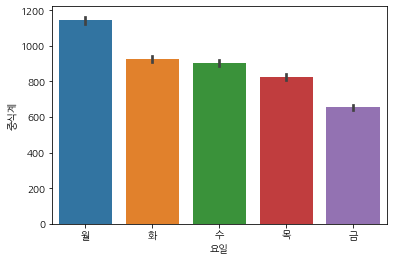

In [13]:
sns.barplot(x='요일', y='중식계',data=train)

<AxesSubplot:xlabel='요일', ylabel='석식계'>

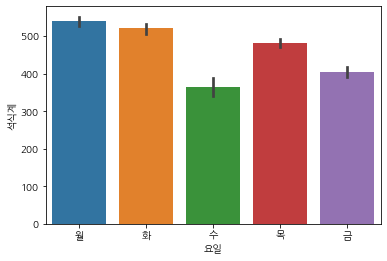

In [15]:
sns.barplot(x='요일', y='석식계',data=train)

### 2) 메뉴 살펴보기
밥 - 국 - 반찬들 순서로 이루어져있다.

In [21]:
train['중식메뉴'].str.split(' ')

0       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 오징어찌개, , 쇠불고기, (쇠고기:호주산...
1       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 김치찌개, , 가자미튀김, , 모둠소세지구...
2       [카레덮밥, (쌀,현미흑미:국내산), 팽이장국, , 치킨핑거, (닭고기:국내산), ...
3       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 쇠고기무국, , 주꾸미볶음, , 부추전, ...
4       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 떡국, , 돈육씨앗강정, (돼지고기:국내산...
                              ...                        
1200    [쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...
1201    [쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...
1202    [전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...
1203    [쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...
1204    [쌀밥/귀리밥/찰현미밥, 들깨미역국, 교촌간장치킨, 옥수수콘치즈구이, 가지고추장무침...
Name: 중식메뉴, Length: 1205, dtype: object

In [23]:
df = train['중식메뉴']
df.iloc[0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '

In [38]:
import re

low = df.iloc[0]
low = re.sub(r"\([^\)+]+\)", "", low)    # 원산지 제거 (정규표현 사용)
low

'쌀밥/잡곡밥  오징어찌개  쇠불고기  계란찜  청포묵무침  요구르트  포기김치  '

In [40]:
low.replace('  ', ' ').strip().split(' ')

['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']

어떤 메뉴가 얼만큼 나왔는지 궁금해서 전처리 후 출력해보았다.

In [70]:
from collections import defaultdict

def get_menu_freg(df):
    menu = defaultdict(int)
    
    for i in range(len(df)):
        low = df.iloc[i]
        low = re.sub(r"\([^\)]+\)", "", low)      # 소괄호부분 제거
        list = low.replace('/', ' ').replace('(New)', '').replace('  ', ' ').strip().split(' ')  # 공백처리 후 문자열 분리
        for j in range(len(list)):
            menu[list[j]] += 1
    return menu

menu1 = get_menu_freg(train['중식메뉴'])
menu1

defaultdict(int,
            {'쌀밥': 1002,
             '잡곡밥': 879,
             '오징어찌개': 1,
             '쇠불고기': 5,
             '계란찜': 24,
             '청포묵무침': 6,
             '요구르트': 29,
             '포기김치': 868,
             '김치찌개': 3,
             '가자미튀김': 5,
             '모둠소세지구이': 3,
             '마늘쫑무침': 19,
             '배추겉절이': 98,
             '카레덮밥': 18,
             '팽이장국': 18,
             '치킨핑거': 16,
             '쫄면야채무침': 8,
             '견과류조림': 7,
             '쇠고기무국': 12,
             '주꾸미볶음': 19,
             '부추전': 11,
             '시금치나물': 21,
             '떡국': 9,
             '돈육씨앗강정': 1,
             '우엉잡채': 18,
             '청경채무침': 14,
             '시래기국': 17,
             '훈제오리구이': 28,
             '도토리묵무침': 18,
             '쌈무': 21,
             '양파절임': 21,
             '꽃게탕': 25,
             '돈육굴소스볶음': 25,
             '옥수수전': 14,
             '유채나물': 10,
             '시금치국': 9,
             '닭감자조림': 1,
             '연두부*양념장': 13,
             '콩나물무침': 2

In [71]:
menu2 = get_menu_freg(train['석식메뉴'])
menu2

defaultdict(int,
            {'쌀밥': 663,
             '잡곡밥': 657,
             '육개장': 29,
             '자반고등어구이': 5,
             '두부조림': 4,
             '건파래무침': 3,
             '포기김치': 900,
             '콩나물밥*양념장': 2,
             '어묵국': 18,
             '유산슬': 10,
             '아삭고추무침': 16,
             '바나나': 17,
             '청국장찌개': 20,
             '황태양념구이': 13,
             '고기전': 15,
             '새송이버섯볶음': 5,
             '미니김밥*겨자장': 1,
             '우동': 23,
             '멕시칸샐러드': 24,
             '군고구마': 6,
             '무피클': 39,
             '차돌박이찌개': 13,
             '닭갈비': 16,
             '감자소세지볶음': 1,
             '콩나물무침': 20,
             '참치회덮밥': 13,
             '맑은국': 35,
             '군만두': 8,
             '과일샐러드': 22,
             '락교': 18,
             '김치콩나물국': 2,
             '미니함박': 2,
             '어묵볶음': 5,
             '물파래무침': 11,
             '깍두기': 81,
             '홍합미역국': 1,
             '등갈비김치찜': 11,
             '임연수구이': 1,
             '브로컬리초장': 2

메뉴를 밥/국/반찬 등으로 나누어서 새로운 칼럼을 생성해보자

<br>

미완성된 함수로 메뉴개수와 메뉴를 살펴보았다.
- 메뉴개수는 6 또는 7, 가끔 8임을 알 수 있었다.
- 전처리된 메뉴 데이터를 몇개 출력해보면 순서가 **밥-국/찌개-반찬3개-디저트(요구르트 등)-김치**로 일정하다는 것을 알 수 있었다.
- 단 메뉴가 6개일 때는 디저트는 없다. 메뉴가 8개인 경우는 간혹 반찬이 4개인 경우이다.
- **주의!!) 1067번 행부터 디저트와 김치의 순서가 바뀐다.**

<br>

메뉴 개수가 8인 경우를 다시 잘 살펴보면 기대한 결과와 다른 경우들이 있다.
- 2020-11-27,금 데이터에 '이연복의 청경채찜'이라는 하나의 메뉴가 공백으로 구분되어 2개 메뉴로 인식된다.
- 2020-10-22,목 데이터에 '쌀밥/ 곤드레밥/찰현미밥'로 입력하여 쌀밥과 다른 밥이 분리된다.
- 간혹 김치의 원산지를 표기할 때 왼쪽 괄호를 닫지 않아 '고추가루:중국산)'이 남는다.

위와 같은 예외가 적기 때문에 직접 데이터를 수정해도 될 것 같다.

In [77]:
def split_menu(df):
    
    for i in range(len(df)):
        low = df.iloc[i]
        low = re.sub(r"\([^\)]+\)", "", low)      # 소괄호부분 제거
        list = low.replace('(New)', '').replace('  ', ' ').strip().split(' ')  # 공백처리 후 문자열 분리
        print(len(list), end=' ')
        
        if len(list) == 8:
            print()
            print(list)

split_menu(train['중식메뉴'])

7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 7 6 6 6 6 6 6 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

오탈자 및 예외가 되는 텍스트를 수정한 train데이터를 다시 불러온 후 출력해보면<br>
이제 메뉴가 8개일 때에 예외가 되는 경우는 없는 것으로 추정된다.

In [78]:
def split_menu(df):
    
    for i in range(len(df)):
        low = df.iloc[i]
        low = re.sub(r"\([^\)]+\)", "", low)      # 소괄호부분 제거
        list = low.replace('(New)', '').replace('  ', ' ').strip().split(' ')  # 공백처리 후 문자열 분리
        print(len(list), end=' ')
        
        if len(list) == 8:
            print()
            print(list)

# 수정한 train데이터 로드 후 전처리
train = pd.read_csv('train_수정.csv')
train['월'] = pd.to_datetime(train['일자']).dt.month
train['연도'] = pd.to_datetime(train['일자']).dt.year

split_menu(train['중식메뉴'])

7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 7 6 6 6 6 6 6 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

### 3) 월별 통계 살펴보기

In [53]:
train_group1 = train.groupby(['연도', '월'])
train_group1.mean()

본사정원수      본사휴가자수      본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
연도   월                                                                 
2016 2   2601.0  153.611111  210.111111      247.611111     0.000000   
     3   2624.0   63.863636  229.363636      221.500000     0.000000   
     4   2643.0   78.150000  247.300000      207.500000     0.000000   
     5   2635.0   89.700000  250.900000      209.200000     0.000000   
     6   2637.0   91.095238  251.523810      199.285714     0.000000   
     7   2643.0  166.523810  224.476190      189.428571     0.000000   
     8   2644.0  314.772727  201.227273      196.636364     0.000000   
     9   2769.0  138.315789  232.842105      269.578947     0.000000   
     10  2670.0  100.700000  252.250000      276.900000     0.000000   
     11  2689.0   98.590909  248.636364      273.863636     0.000000   
     12  2705.0  149.454545  228.954545      234.000000     0.000000   
2017 1   2697.0  118.450000  194.300000      216.350000     0.000000   
     2   2632.0   85.550000  228.000000      271.350000     0.000000   
     3   2627.0   86.363636  244.818182      243.863636     0.000000   
     4   2626.0   76.550000  264.150000      230.800000     0.000000   
     5   2637.0  212.315789  239.315789      225.105263     0.000000   
     6   2648.0  118.619048  257.047619      219.142857     0.000000   
     7   2839.0  165.904762  247.571429      221.000000     0.000000   
     8   2645.0  326.636364  221.500000      209.590909     0.000000   
     9   2642.0  103.523810  264.761905      231.190476     0.000000   
     10  2645.0   92.250000  267.500000      300.625000     0.000000   
     11  2644.0  109.272727  274.954545      243.227273     0.000000   
     12  2665.0  159.950000  253.000000      244.650000     0.000000   
2018 1   2655.0   91.909091  219.363636      221.136364     0.000000   
     2   2707.0  124.000000  246.555556      292.666667     0.000000   
     3   2714.0  114.476190  256.047619      275.619048     0.000000   
     4   2714.0  119.142857  263.714286      245.476190     0.000000   
     5   2721.0  142.900000  263.300000      223.100000     0.000000   
     6   2728.0  141.315789  260.052632      243.052632     0.000000   
     7   2704.0  190.045455  249.272727      191.681818     0.000000   
     8   2996.0  357.818182  233.727273      198.090909     0.000000   
     9   2763.0  109.600000  275.400000      241.466667     0.000000   
     10  2805.0  135.294118  276.235294      220.882353     0.000000   
     11  2815.0  117.636364  278.318182      220.136364     0.000000   
     12  2846.0  208.700000  237.550000      317.250000     0.000000   
2019 1   2985.0  108.954545  223.181818      246.818182     0.000000   
     2   2806.0  149.058824  226.470588      347.529412     0.000000   
     3   2836.0  103.100000  254.750000      352.150000     0.000000   
     4   2822.0  104.681818  261.590909      326.090909     0.000000   
     5   2825.0  121.380952  270.904762      315.095238     0.000000   
     6   2758.0  144.210526  262.263158      341.684211     0.000000   
     7   2760.0  204.608696  258.608696      260.086957     0.000000   
     8   3305.0  361.000000  246.285714      258.952381     0.000000   
     9   3111.0  149.315789  252.578947      322.631579     0.000000   
     10  3121.0  191.600000  277.400000      306.900000     0.000000   
     11  3104.0  183.428571  284.809524      316.666667     0.000000   
     12  3111.0  295.095238  243.714286      317.809524     0.000000   
2020 1   2821.0  172.300000  217.250000      256.600000     1.350000   
     2   2872.0  101.050000  216.800000      384.550000     0.650000   
     3   2950.0  117.181818  175.681818      421.181818   129.454545   
     4   2962.0  198.700000  179.750000      344.250000   434.300000   
     5   2962.0  156.631579  236.842105      321.789474   231.473684   
     6   2956.0  109.000000  256.200000      311.000000   192.900000   
     7   2997.0  184.173913  249.608696      297.6

- 재택근무자는 2020년 1월부터 생겼다.
- 총인원이라고 볼 수 있는 본사정원 수는 대체로 증가하고 있다.
- 중식계는 석식계보다 거의 항상 많은 것으로 보인다.

더 궁금한 것들
- 중식계, 석식계 비교
- 본사시간외근무명령서승인건수와 중식계, 석식계 관계 그래프

메뉴 전처리
- 메뉴\*소스로 된 메뉴는 \*뒤의 문자열은 제거